<a href="https://colab.research.google.com/github/ShazamZX/Tesla-Stock/blob/main/Sentiment_vs_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt
import collections
upper = dt.datetime(2021,1,31)
lower = dt.datetime(2020,9,2)

In [2]:
files.upload()

Saving ElonMusk.csv to ElonMusk.csv


{'ElonMusk.csv': b',date,text,polarity,Vader Sentiment\n0,2021-02-25 11:57:44,"[\'3mm\', \'of\', \'full\', \'hard\', \'301\', \'or\', \'304\', \'Stainless\', \'is\', \'bulletproof\', \'to\', \'a\', \'9mm\', \'or\', \'.45\']",0.0861111111111111,0.0\n1,2021-02-25 11:52:19,"[\'Not\', \'a\', \'meta4I\', \'mean\', \'actual\', \'books\']",-0.15625,0.0\n2,2021-02-25 11:19:20,[\'Both\'],0.0,0.0\n3,2021-02-25 11:10:19,"[\'I\', \'admit\', \'to\', \'judging\', \'books\', \'by\', \'their\', \'cover\']",0.0,0.0\n4,2021-02-25 06:35:22,"[\'Starship\', \'to\', \'the\', \'moon\']",0.0,0.0\n5,2021-02-25 05:16:27,"[\'Sounds\', \'like\', \'a\', \'good\', \'idea\']",0.7,0.0\n6,2021-02-25 05:15:02,"[\'Out\', \'on\', \'launch\', \'padengine\', \'swap\', \'underway\']",0.0,0.0\n7,2021-02-25 01:28:24,"[\'Probably\', \'mid\', \'yearbut\', \'Starlink\', \'is\', \'really\', \'meant\', \'for\', \'those\', \'who\', \'are\', \'least\', \'servedBay\', \'usually\', \'has\', \'great\', \'Internet.\']",0.090000000000000

In [3]:
df = pd.read_csv('ElonMusk.csv', parse_dates= ['date'], dayfirst= True)
df.set_index('date', inplace= True)
df['Smooth_polarity'] = df['polarity'].rolling(window = 100).mean()
df.dropna(inplace = True)
df = df.resample('D').mean()
df.dropna(inplace= True)

In [4]:
import pandas_datareader as web
start = dt.datetime(2020, 8, 20)
end = dt.datetime(2021,2,21)
df2 = web.DataReader('TSLA', start= start, end= end, data_source= 'yahoo')
df2['Smooth_Adj Close'] = df2['Adj Close'].rolling(window = 10).mean()
df2.dropna(inplace= True)
x = collections.Counter(df2.index > upper)
df2.drop(df2.tail(x.get(True)).index, inplace= True)

In [5]:
df.drop(df.head((collections.Counter(df.index<lower)).get(True)).index, inplace = True)
df.drop(df.tail((collections.Counter(df.index>upper)).get(True)).index, inplace = True)

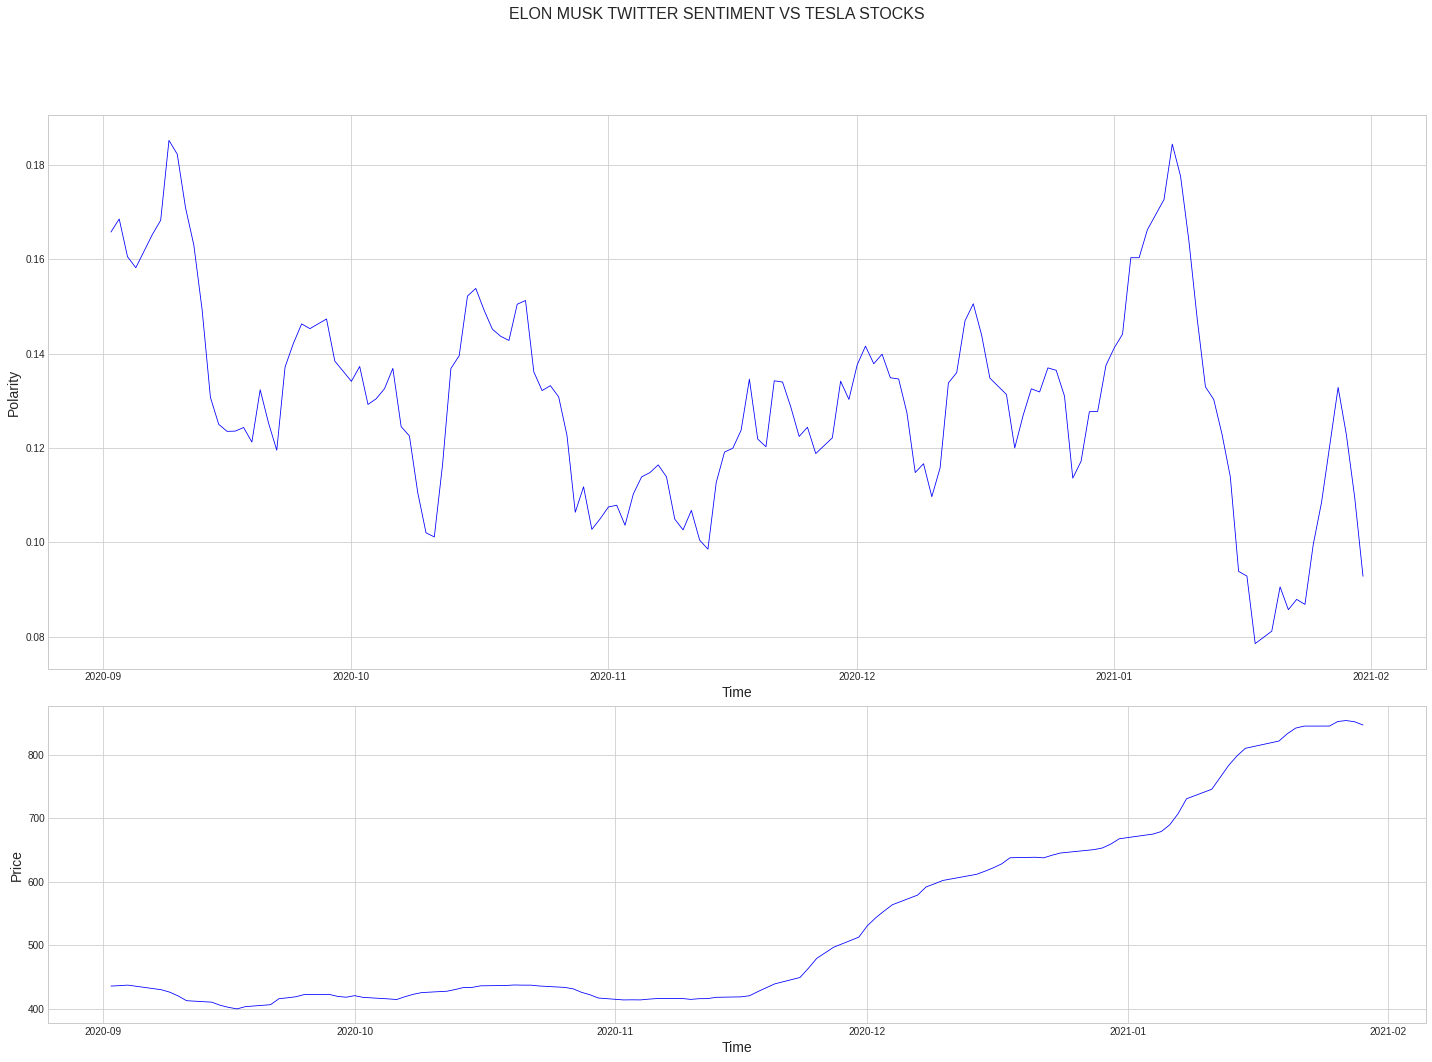

In [6]:
style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(20,15))
ax1 = plt.subplot2grid((8,1),(0,0), rowspan= 5, colspan= 1)
ax2 = plt.subplot2grid((8,1),(5,0), rowspan= 3, colspan= 1)
ax1.plot(df.index, df['Smooth_polarity'], linewidth= 0.8, color= 'blue')
ax2.plot(df2.index,df2['Smooth_Adj Close'],  linewidth= 0.8, color= 'blue')
ax1.set_xlabel('Time', fontsize= 14)
ax1.set_ylabel('Polarity',fontsize= 14)
ax2.set_xlabel('Time', fontsize= 14)
ax2.set_ylabel('Price', fontsize= 14)
fig.suptitle('ELON MUSK TWITTER SENTIMENT VS TESLA STOCKS', fontsize= 16)
fig.tight_layout()
fig.subplots_adjust(top = 0.88)

